In [1225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix
import warnings
import unidecode
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [1226]:
old_df = pd.read_csv('/Users/mac/crawdata/cleaned_data_new.csv')
old_df.head()

,District,Adress,Price,Land Area,Bedroom,Floor,Bathroom,Link,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2
0,quan 3,"Đường Lê Văn Sỹ, Phường 13",69.0,210.0,NaN,5.0,NaN,https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/Sổ hồng,Không xác định,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.328571
1,quan 1,"Đường Trần Hưng Đạo, Phường Cô Giang",22.0,72.0,8.0,4.0,NaN,https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/Sổ hồng,Không xác định,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305556
2,tan phu,"Đường 30/4, Phường Tân Thành",25.0,213.0,1.0,1.0,1.0,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/Sổ hồng,Nam,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.117371
3,thu duc,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ",15.5,108.0,4.0,5.0,4.0,https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Bắc,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143519
4,nha be,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè",6.2,50.0,4.0,3.0,5.0,https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/Sổ hồng,Không xác định,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124000


In [1227]:
def remove_outlier(df,column):
    df_temp = df.copy()
    mean = df_temp[column].mean()
    std = df_temp[column].std()
    left_tail = mean-3*std
    right_tail = mean+3*std
    print(f'Outliers of column {column} are outside the range from {left_tail} to {right_tail}')

    return df_temp[(df_temp[column] < left_tail) | (df_temp[column] > right_tail)].index

old_df.drop(remove_outlier(old_df,'Price'),inplace=True)
old_df.reset_index(drop=True,inplace=True)

Outliers of column Price are outside the range from -87.65956030584772 to 123.97659018533813


In [1228]:
old_df.drop('Adress',axis=1,inplace=True)

In [1229]:
#List of categorical variables
categorical_features = list(old_df.select_dtypes(include='object').columns)
categorical_features

['District', 'Link', 'legal_status', 'Direction']

In [1230]:
# List of categorical features to encode
categorical_features = ['District', 'Adress', 'Link', 'legal_status', 'Direction']  

# Label encoding
for feature in categorical_features:
    if feature not in ['Link', 'Adress']:  # Corrected condition
        labels_ordered = old_df.groupby([feature])['Price'].median().sort_values().index
        labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
        old_df[feature] = old_df[feature].map(labels_ordered)

# Display the updated DataFrame
print(old_df)

       District  Price  Land Area  Bedroom  Floor  Bathroom  \
0            18   69.0      210.0      NaN    5.0       NaN   
1            19   22.0       72.0      8.0    4.0       NaN   
2             8   25.0      213.0      1.0    1.0       1.0   
3            10   15.5      108.0      4.0    5.0       4.0   
4             3    6.2       50.0      4.0    3.0       5.0   
...         ...    ...        ...      ...    ...       ...   
17191        14   12.6      144.0      2.0    NaN       2.0   
17192         8   15.0       80.0      6.0    4.0       7.0   
17193        10   14.0       87.8      4.0    3.0       5.0   
17194         8    8.8       72.0      NaN    3.0       NaN   
17195        10   29.7     1600.0      0.0    0.0       0.0   

                                                                                                                                                                                          Link  \
0                                  https://batdon

In [1231]:
old_df['Category'] = old_df['Link']
old_df.drop('Link',axis=1,inplace=True)

In [1232]:
skewed_features = ['Land Area']
df = old_df.copy()
df[skewed_features] = np.log(df[skewed_features]+1)

In [1233]:
#Make the list of features which has missing values
features_with_na = [col for col in df.columns if (df[col].isnull().sum()>0)]
#Print the features name and the percentage of missing values
for feature in features_with_na:
    print(f'{feature}: {np.round(df[feature].isnull().mean()*100,4)} % missing values')

Bedroom: 14.5499 % missing values
Floor: 24.622 % missing values
Bathroom: 18.6148 % missing values
legal_status: 12.0377 % missing values


In [1234]:
# Calculate the correlation matrix using only numeric columns
corr = old_df.corr(numeric_only=True).abs()

# Display the correlation matrix with a background gradient
corr.style.background_gradient(cmap='coolwarm')

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2
District,1.000000,0.398758,0.076586,0.138554,0.370159,0.136354,0.092512,0.056422,0.049766,0.000035,0.055525,0.025769,0.204385,0.107471,0.110200,0.026520,0.238362,0.007251,0.024378,0.047572,0.566135
Price,0.398758,1.000000,0.067951,0.383882,0.400214,0.384776,0.140552,0.035551,0.065070,0.012662,0.195264,0.043127,0.051367,0.174676,0.135054,0.050312,0.516203,0.082001,0.027212,0.009057,0.679743
Land Area,0.076586,0.067951,1.000000,0.013648,0.082977,0.014383,0.020779,0.003604,0.047579,0.020850,0.003215,0.033907,0.164761,0.025283,0.011242,0.009362,0.002238,0.005223,0.005629,0.000080,0.045767
Bedroom,0.138554,0.383882,0.013648,1.000000,0.520488,0.946917,0.101652,0.006223,0.043489,0.092375,0.121417,0.103062,0.231126,0.050292,0.022831,0.006852,0.257072,0.018300,0.006624,0.008344,0.284479
Floor,0.370159,0.400214,0.082977,0.520488,1.000000,0.540821,0.025391,0.046170,0.162454,0.145120,0.201694,0.225175,0.560537,0.101264,0.092917,0.020269,0.355745,0.027741,0.018280,0.019706,0.496662
Bathroom,0.136354,0.384776,0.014383,0.946917,0.540821,1.000000,0.109701,0.005491,0.054994,0.103790,0.118044,0.138447,0.227588,0.056260,0.026404,0.015111,0.257301,0.013933,0.006083,0.011031,0.289679
legal_status,0.092512,0.140552,0.020779,0.101652,0.025391,0.109701,1.000000,0.017593,0.151212,0.067391,0.042209,0.105126,0.081108,0.014936,0.021152,0.014504,0.166102,0.026376,0.014155,0.015206,0.174495
Direction,0.056422,0.035551,0.003604,0.006223,0.046170,0.005491,0.017593,1.000000,0.036109,0.008769,0.006040,0.002123,0.024575,0.000024,0.024205,0.003953,0.009265,0.006832,0.004510,0.014015,0.036205
Furniture,0.049766,0.065070,0.047579,0.043489,0.162454,0.054994,0.151212,0.036109,1.000000,0.008756,0.034524,0.030457,0.255020,0.005330,0.017718,0.047591,0.060180,0.039607,0.010596,0.017350,0.024422
Have Mezzanine,0.000035,0.012662,0.020850,0.092375,0.145120,0.103790,0.067391,0.008769,0.008756,1.000000,0.009383,0.223099,0.071295,0.036001,0.026327,0.030388,0.027748,0.006451,0.011834,0.026628,0.082075


In [1235]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

def complete_na(data, feature_na, features_pred):
    # Chuẩn bị dữ liệu
    df = data[features_pred + [feature_na]].copy()
    
    # Loại bỏ các hàng có giá trị thiếu
    df.dropna(inplace=True)

    # Nếu không đủ dữ liệu để huấn luyện
    if len(df) < 2:
        raise ValueError("Not enough data to train the model.")
    
    # Tách dữ liệu
    X = df[features_pred]
    y = df[feature_na]

    # Chia dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3107)

    # Tạo pipeline cho RandomForestRegressor
    pipeline = Pipeline(steps=[
        ('model', RandomForestRegressor(n_estimators=100, random_state=3107))
    ])

    # Huấn luyện mô hình
    pipeline.fit(X_train, y_train)

    return pipeline


In [1236]:
# Điền dữ liệu thiếu cho cột 'Floor'
if df['Floor'].isnull().any():
    floor_model = complete_na(df, feature_na='Floor', features_pred=['Bathroom', 'Bedroom', 'Price/m2'])
    df.loc[df['Floor'].isnull(), 'Floor'] = floor_model.predict(df.loc[df['Floor'].isnull(), ['Bathroom', 'Bedroom', 'Price/m2']])

# Điền dữ liệu thiếu cho cột 'Bathroom'
if df['Bathroom'].isnull().any():
    bathroom_model = complete_na(df, feature_na='Bathroom', features_pred=['Floor', 'Bedroom'])
    df.loc[df['Bathroom'].isnull(), 'Bathroom'] = bathroom_model.predict(df.loc[df['Bathroom'].isnull(), ['Floor', 'Bedroom']])

# Điền dữ liệu thiếu cho cột 'Bedroom'
if df['Bedroom'].isnull().any():
    bedroom_model = complete_na(df, feature_na='Bedroom', features_pred=['Bathroom'])
    df.loc[df['Bedroom'].isnull(), 'Bedroom'] = bedroom_model.predict(df.loc[df['Bedroom'].isnull(), ['Bathroom']])

In [1237]:
#Drop others missing values
df.dropna(inplace=True)
old_df = old_df.loc[df.index]
df.reset_index(drop=True,inplace=True)
old_df.reset_index(drop=True,inplace=True)

In [1238]:
df.head()

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2,Category
0,18,69.0,5.351858,4.0,5.0,3.968099,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.328571,https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613
1,19,22.0,4.290459,8.0,4.0,7.495389,2.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305556,https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519
2,8,25.0,5.365976,1.0,1.0,1.000000,2.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.117371,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128
3,10,15.5,4.691348,4.0,5.0,4.000000,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143519,https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712
4,3,6.2,3.931826,4.0,3.0,5.000000,2.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124000,https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901


In [1239]:
#Extract information from header
def return_index_category(df_temp,column,key):
    index = df_temp[df_temp[column].str.lower().str.contains(key)].index
    df_temp.drop(index,inplace=True)

    return index

#Create temporary data frame and a list for saving information from header
short_category = np.empty(len(df),dtype='object')
temp = df.copy()
land_index = temp[temp['Is Land']==1].index
short_category[land_index] = 'land'
temp.drop(land_index,inplace=True)

short_category[return_index_category(temp,'Category','shophouse')] = 'shophouse'
short_category[return_index_category(temp,'Category','nha-hem')] = 'house'
short_category[return_index_category(temp,'Category','nha-mat-pho')] = 'townhouse'
short_category[return_index_category(temp,'Category','khach-san')] = 'hotel-villa'
short_category[return_index_category(temp,'Category','nha-rieng')] = 'house'
short_category[return_index_category(temp,'Category','can-ho')] = 'condominium'
short_category[return_index_category(temp,'Category','nguyen can')] = 'condominium'
short_category[return_index_category(temp,'Category','biet-thu')] = 'hotel-villa'
short_category[return_index_category(temp,'Category','chung-cu')] = 'condominium'
short_category[temp.index] = 'others'

#Re-assigned to Category column
df['Category'] = short_category
old_df['Category'] = short_category

In [1240]:
df['Category'].value_counts()

Category
house          5494
condominium    3679
townhouse      3584
land           1192
hotel-villa    1047
shophouse       129
others            1
Name: count, dtype: int64

In [1241]:
df = df[df['Category'].isin(['house','townhouse','hotel-villa','shophouse','condominium','land'])]
old_df = old_df[old_df['Category'].isin(['house','townhouse','hotel-villa','shophouse','condominium','land'])]
df.reset_index(drop=True,inplace=True)
old_df.reset_index(drop=True,inplace=True)

In [1242]:
df.drop('Is Land',axis=1,inplace=True)
old_df.drop('Is Land',axis=1,inplace=True)

In [1243]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# split into input and output elements
X, y = df.drop('Category',axis=1), df['Category']
# transform the dataset
strategy = {'house':5500, 'land':1200, 'condominium':3700, 'townhouse':3600, 'hotel-villa':1100, 'shophouse': 130}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

df = pd.merge(X,y,left_index=True,right_index=True)
df

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2,Category
0,18,69.000000,5.351858,4.000000,5.000000,3.968099,2.0,3,1.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000,0.328571,townhouse
1,19,22.000000,4.290459,8.000000,4.000000,7.495389,2.0,3,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.305556,house
2,8,25.000000,5.365976,1.000000,1.000000,1.000000,2.0,4,1.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000,0.117371,townhouse
3,10,15.500000,4.691348,4.000000,5.000000,4.000000,1.0,2,1.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.143519,hotel-villa
4,3,6.200000,3.931826,4.000000,3.000000,5.000000,2.0,3,1.0,0.0,0.00000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.124000,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15225,10,16.546887,4.412643,4.156291,4.843709,4.843709,2.0,1,1.0,0.0,0.00000,0.843709,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000,0.203189,townhouse
15226,13,58.823140,5.107908,3.316793,5.823140,4.236112,2.0,3,0.0,0.0,0.82314,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000,0.358519,townhouse
15227,11,9.017331,4.755093,2.000000,2.188143,2.000000,2.0,3,0.0,0.0,0.00000,0.000000,0.019257,0.0,0.0,1.0,0.019257,0.0,0.000000,0.078475,townhouse
15228,10,12.907130,4.411944,4.000000,3.000000,4.000000,2.0,3,0.0,0.0,0.00000,0.185740,0.185740,0.0,0.0,1.0,0.000000,0.0,0.185740,0.158701,townhouse


In [1244]:
df['Category'].value_counts()

Category
house          5500
condominium    3700
townhouse      3600
land           1200
hotel-villa    1100
shophouse       130
Name: count, dtype: int64

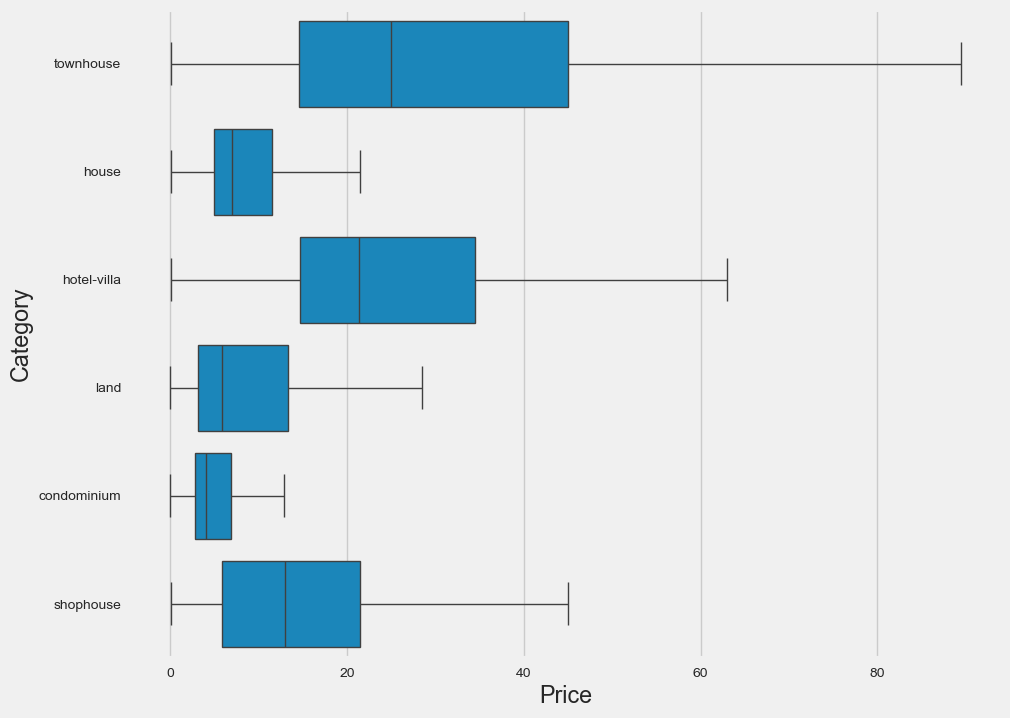

In [1245]:
#Relationship between Category and House Price
plt.figure(figsize=(10,8))
sns.boxplot(y='Category',x='Price',data=df,showfliers=False)
plt.show()

In [1246]:
df.groupby("Category")["Category"].agg("count")

Category
condominium    3700
hotel-villa    1100
house          5500
land           1200
shophouse       130
townhouse      3600
Name: Category, dtype: int64

Sử dụng đồ thị Elbow để nhóm các dữ liệu ngoại trừ giá theo kmean tối ưu nhất 



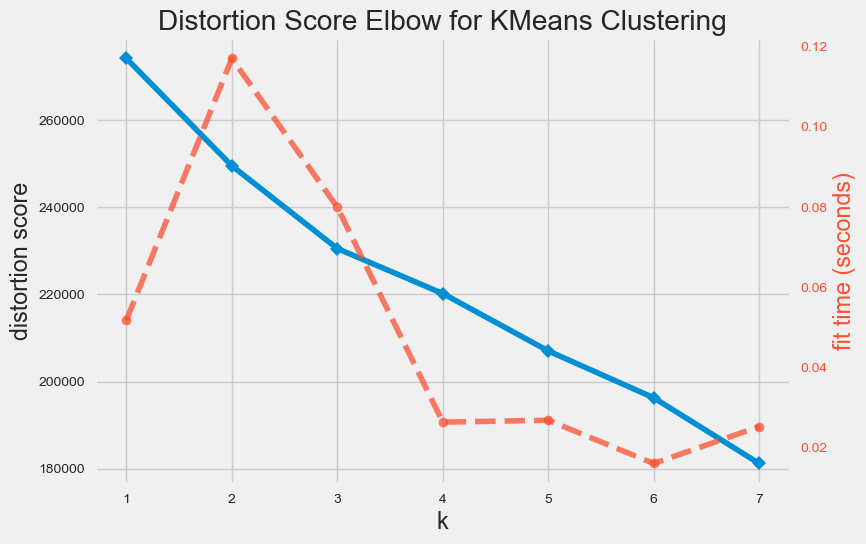

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1247]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

cluster_df = df.copy()
cluster_df = cluster_df.select_dtypes(exclude='O')

#Scale data
scaler = StandardScaler()
scale_df = pd.DataFrame(scaler.fit_transform(cluster_df),columns=cluster_df.columns)
X = scale_df.drop(['Price','Price/m2'],axis=1)

#Find the best k cluster
kmeans = KMeans(random_state=1209)  
visualizer = KElbowVisualizer(kmeans, k=(1,8))
visualizer.fit(X)
visualizer.show()

In [1248]:
#Use k = 3
kmeans = KMeans(n_clusters=3,max_iter=500)
kmeans.fit(X)
#Segmentation
df['Cluster'] = kmeans.predict(X)

In [1249]:
#PCA for visualization
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] 
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(X))
pca_df['Cluster'] = df['Cluster']
pca_df['Category'] = df['Category']

pca_df.head()

,0,1,Cluster,Category
0,1.923115,-1.245008,1,townhouse
1,1.524044,-0.703680,1,house
2,-0.368669,-1.563517,0,townhouse
3,0.163588,-0.670069,0,hotel-villa
4,0.106979,0.287471,0,house


In [1250]:
df.groupby("Category")["Category"].agg("count")

Category
condominium    3700
hotel-villa    1100
house          5500
land           1200
shophouse       130
townhouse      3600
Name: Category, dtype: int64

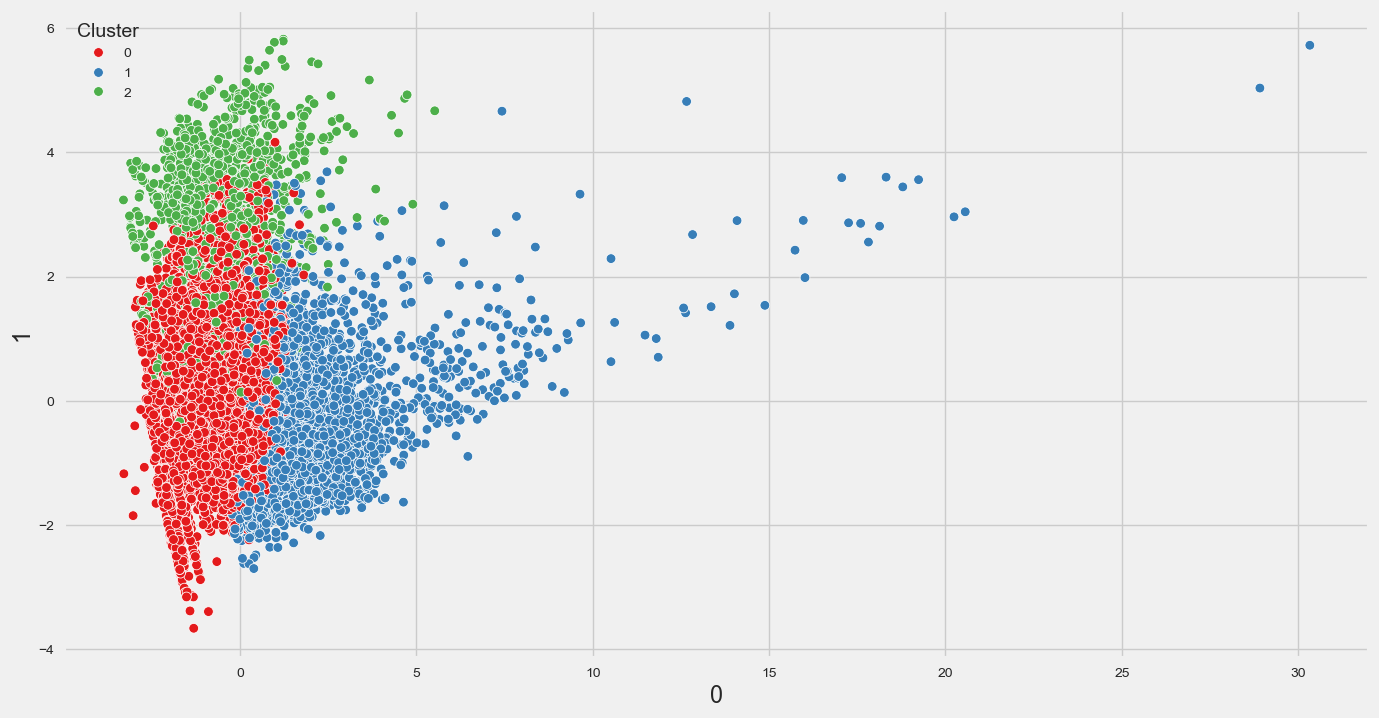

In [1251]:
#PCA based on KMeans
plt.figure(figsize=(15,8))
sns.scatterplot(x=0,y=1,data=pca_df,hue=pca_df['Cluster'],palette='Set1')
plt.show()

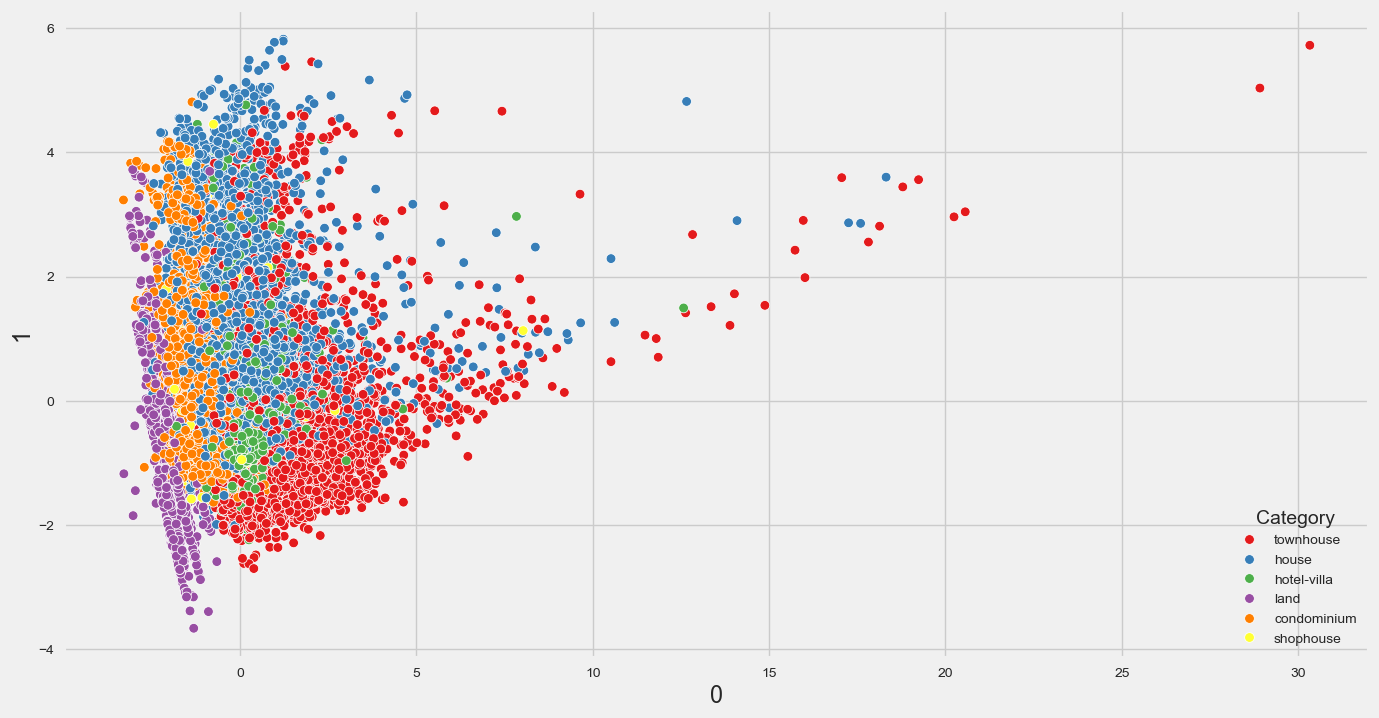

In [1252]:
#PCA based on Category
plt.figure(figsize=(15,8))
sns.scatterplot(x=0,y=1,data=pca_df,hue=df['Category'],palette='Set1')
plt.show()

In [1253]:
#Encoding Category columns
labels_ordered=df.groupby(['Category'])['Price'].median().sort_values().index
labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}

old_df['Category'] = old_df['Category'].map(labels_ordered)
df['Category'] = df['Category'].map(labels_ordered)

In [1254]:
land_df = df.loc[df['Category']==0].reset_index(drop=True)
home_df = df.loc[df['Category']!=0].reset_index(drop=True)

In [1255]:
#Remove cluster column
home_df.drop('Cluster',axis=1,inplace=True)
land_df.drop('Cluster',axis=1,inplace=True)

In [1256]:
land_df.describe().loc[['std']]

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2,Category
std,3.743351,7.00168,0.388001,0.785214,0.558955,0.68939,0.553031,0.697551,0.477099,0.076891,0.243917,0.152615,0.442036,0.373334,0.259746,0.0,0.308845,0.028467,0.343398,0.04111,0.0


In [1257]:
home_df.describe().loc[['std']]

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2,Category
std,4.533469,19.576977,0.740568,4.825835,1.847334,4.900687,0.164381,0.691965,0.499545,0.305344,0.226156,0.410559,0.441544,0.394575,0.280668,0.463668,0.36648,0.062354,0.319788,0.118314,1.495537


In [1258]:
land_df.drop([
    'Category','Bedroom','Bathroom','Floor','Have Mezzanine','Have Rooftop','Have Basement','Frontage'
],axis=1,inplace=True)

In [1259]:
corr = land_df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,District,Price,Land Area,legal_status,Direction,Furniture,Near Market,Near School,Near Hospital,Securities Space,Have Car Park,Urgent Sale,Price/m2
District,1.000000,0.239064,0.138678,0.077699,0.006155,0.032652,0.062067,0.096192,0.005126,0.028124,0.028426,0.002240,0.347592
Price,0.239064,1.000000,0.662079,0.002121,0.007911,0.027507,0.135543,0.108449,0.048494,0.049976,0.013323,0.053920,0.788088
Land Area,0.138678,0.662079,1.000000,0.093108,0.015761,0.007828,0.077835,0.042018,0.014626,0.030358,0.022641,0.004539,0.306778
legal_status,0.077699,0.002121,0.093108,1.000000,0.007502,0.243194,0.012946,0.018941,0.000667,0.001865,0.002153,0.060863,0.036552
Direction,0.006155,0.007911,0.015761,0.007502,1.000000,0.033360,0.001722,0.001101,0.010603,0.032196,0.003687,0.018804,0.002161
Furniture,0.032652,0.027507,0.007828,0.243194,0.033360,1.000000,0.039865,0.009891,0.007487,0.011831,0.001025,0.066249,0.049118
Near Market,0.062067,0.135543,0.077835,0.012946,0.001722,0.039865,1.000000,0.368654,0.297225,0.144137,0.004317,0.065280,0.145762
Near School,0.096192,0.108449,0.042018,0.018941,0.001101,0.009891,0.368654,1.000000,0.420616,0.126246,0.012657,0.007129,0.142233
Near Hospital,0.005126,0.048494,0.014626,0.000667,0.010603,0.007487,0.297225,0.420616,1.000000,0.044606,0.007987,0.009595,0.054417
Securities Space,0.028124,0.049976,0.030358,0.001865,0.032196,0.011831,0.144137,0.126246,0.044606,1.000000,0.020901,0.058626,0.042380


In [1260]:
corr = home_df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2,Category
District,1.000000,0.414455,0.082069,0.127810,0.391591,0.140216,0.094929,0.084610,0.061648,0.003587,0.080690,0.027510,0.103264,0.118644,0.034631,0.280499,0.008273,0.025769,0.065284,0.602694,0.284845
Price,0.414455,1.000000,0.541634,0.232263,0.407572,0.249630,0.027772,0.047989,0.068881,0.052186,0.249158,0.111882,0.198042,0.164194,0.061063,0.472330,0.105410,0.036132,0.024196,0.637365,0.518025
Land Area,0.082069,0.541634,1.000000,0.087608,0.037019,0.096519,0.002634,0.016057,0.180104,0.117780,0.146993,0.181720,0.167617,0.113251,0.070591,0.185180,0.111618,0.038431,0.037587,0.039090,0.198504
Bedroom,0.127810,0.232263,0.087608,1.000000,0.440018,0.940680,0.019531,0.002093,0.151801,0.061058,0.132852,0.080514,0.050937,0.027547,0.007044,0.153999,0.023298,0.004707,0.002081,0.175604,0.209583
Floor,0.391591,0.407572,0.037019,0.440018,1.000000,0.478507,0.031682,0.049370,0.187390,0.147347,0.207960,0.222975,0.106249,0.096688,0.017760,0.369387,0.025862,0.008432,0.021988,0.510290,0.481981
Bathroom,0.140216,0.249630,0.096519,0.940680,0.478507,1.000000,0.023085,0.001752,0.147935,0.065443,0.144202,0.097940,0.059671,0.034992,0.012205,0.162655,0.022731,0.006047,0.000487,0.189314,0.220442
legal_status,0.094929,0.027772,0.002634,0.019531,0.031682,0.023085,1.000000,0.042395,0.004970,0.008170,0.000491,0.036499,0.028170,0.004022,0.014019,0.065801,0.008023,0.007899,0.006108,0.046350,0.007364
Direction,0.084610,0.047989,0.016057,0.002093,0.049370,0.001752,0.042395,1.000000,0.018957,0.016527,0.009574,0.008949,0.005305,0.035253,0.009001,0.011299,0.002041,0.004351,0.015519,0.048292,0.019531
Furniture,0.061648,0.068881,0.180104,0.151801,0.187390,0.147935,0.004970,0.018957,1.000000,0.063023,0.011730,0.123635,0.051210,0.043167,0.069535,0.029950,0.090563,0.029979,0.027994,0.030873,0.058720
Have Mezzanine,0.003587,0.052186,0.117780,0.061058,0.147347,0.065443,0.008170,0.016527,0.063023,1.000000,0.019344,0.210920,0.033106,0.026487,0.024394,0.004251,0.008783,0.012244,0.024085,0.045805,0.006175


In [1261]:
home_drop = ['Bedroom']
home_df.drop(home_drop,axis=1,inplace=True)

([<matplotlib.axis.XTick at 0x17b6d1cd0>,
 [Text(0, 0, 'District'),
  Text(1, 0, 'Land Area'),
  Text(2, 0, 'legal_status'),
  Text(3, 0, 'Direction'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Near Market'),
  Text(6, 0, 'Near School'),
  Text(7, 0, 'Near Hospital'),
  Text(8, 0, 'Securities Space'),
  Text(9, 0, 'Have Car Park'),
  Text(10, 0, 'Urgent Sale')])

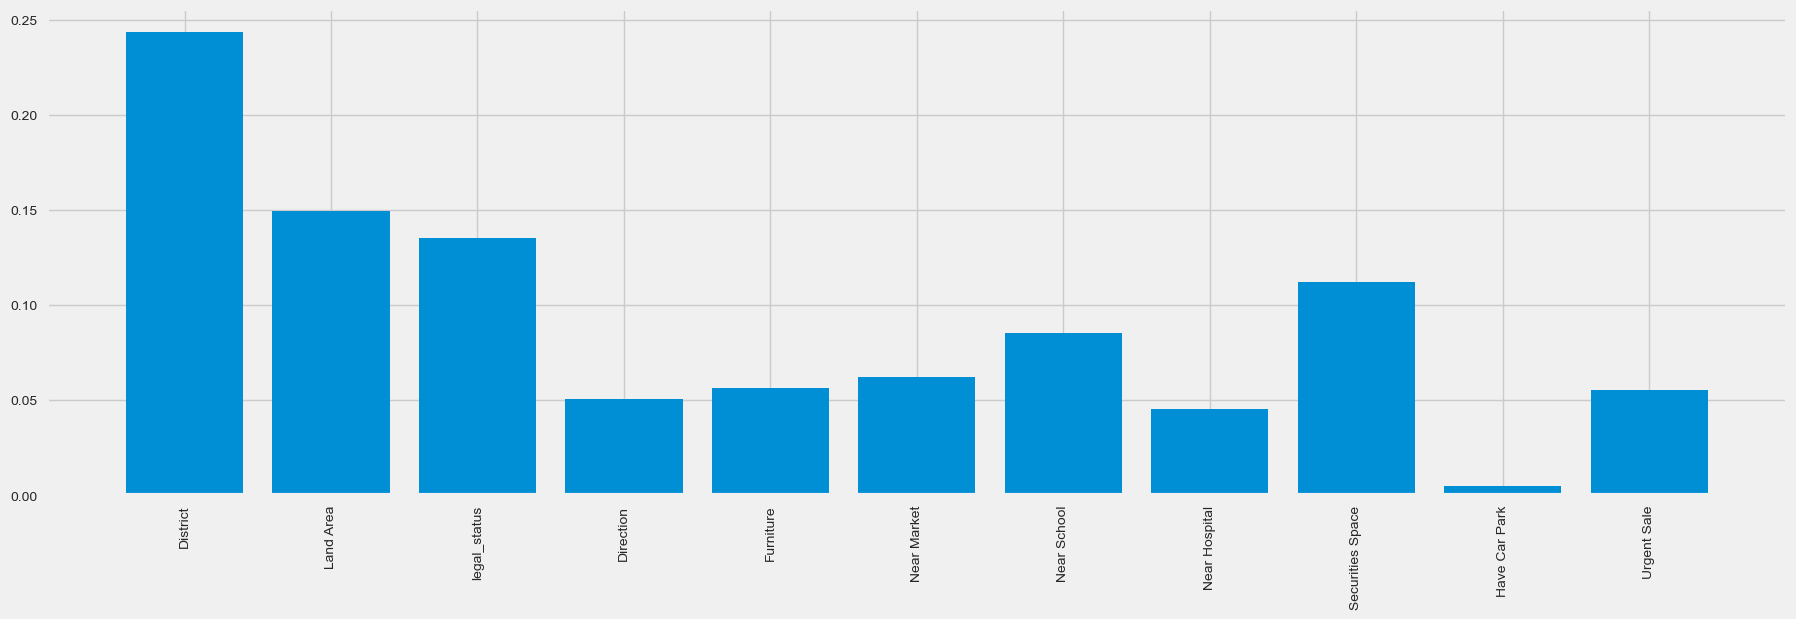

In [1262]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

X = land_df.drop(['Price','Price/m2'],axis=1)
y = land_df['Price/m2']

model = XGBRegressor()
model.fit(X,y)

plt.figure(figsize=(20,6))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(ticks=range(len(list(X.columns))),labels = list(X.columns),rotation=90)

In [1263]:
from sklearn.ensemble import IsolationForest

# Kiểm tra số lượng đặc trưng trong home_df
n_features = home_df.shape[1]

# Thiết lập max_features sao cho nhỏ hơn hoặc bằng số lượng đặc trưng
max_features = min(n_features, 27)  # 27 là giá trị bạn đã sử dụng trước đó

# Khởi tạo và huấn luyện Isolation Forest
clf = IsolationForest(random_state=3107, max_features=max_features)
clf.fit(home_df)

# Dự đoán và loại bỏ outliers
home_df['Anomalies'] = clf.predict(home_df)
home_df = home_df[home_df['Anomalies'] == 1]
home_df.drop(['Anomalies'], axis=1, inplace=True)
home_df.reset_index(drop=True, inplace=True)

In [1264]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=1209,max_features=19)
clf.fit(home_df)

home_df['Anomalies'] = clf.predict(home_df)
home_df = home_df[home_df['Anomalies']==1]
home_df.drop('Anomalies',axis=1,inplace=True)
home_df.reset_index(drop=True,inplace=True)

In [1265]:
home_df.to_csv('/Users/mac/crawdata/bds_train_data.csv',index=False)